# Introduction 

In this notebook, I implemented all the baselines except the Logistic Regression from scratch which is present on the .py file. This notebook provides the reference to the following models:
- Dummy Classifier 
- Random Forest Classifier
- Convolutional Neural Network

Each section of the notebook is self-explanatory and the code is well commented. I have also provided the link to the .py file which contains the Logistic Regression model.

##### Importing the required libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For normalizing
from sklearn.preprocessing import StandardScaler
# For split data
from sklearn.model_selection import train_test_split

#### Importing the data from the .csv file

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_labels = pd.read_csv('train_result.csv')

# Create a new column in the train dataframe that contains the result of the train_result dataframe
train['result'] = train_labels['Class']

df_features = train.iloc[:, :1568]
df_label = train.iloc[:, 1569]
df_test = test.iloc[:, :1568]

#### Visualize the data along with the labels of first 10 images

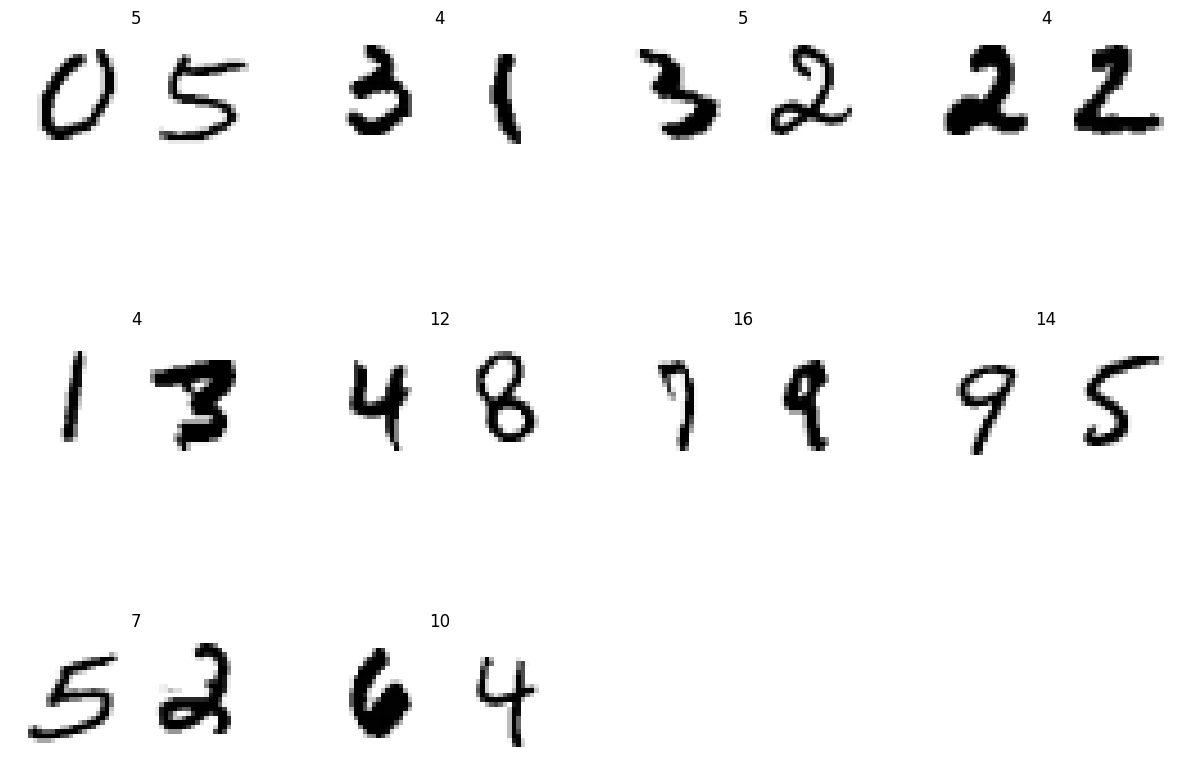

In [3]:
#Source : https://thedatafrog.com/en/articles/handwritten-digit-recognition-scikit-learn/
def plot_multi():
    '''Plots 10 digits'''
    nplots = 10
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(df_features.iloc[j].values.reshape(28,56), cmap='binary')
        plt.title(df_label.iloc[j])
        plt.axis('off')
    plt.show()
plot_multi()

#### Normalize the data and split it into train and test sets

In [5]:
scaler = StandardScaler()
scaler.fit(df_features)
df_features = scaler.transform(df_features)
df_test = scaler.transform(df_test)


In [7]:
# Split the dataset into the Training set and Test set using train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size = 0.2, random_state = 0)

## Dummy Classifier

##### Using the basic DummyClassifier to clear the first baseline of the competition. Simply, training the X_train and then predicting it through the test set.

#### Import required libraries

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
clf_dummy = DummyClassifier(random_state=42,strategy='stratified') 

In [10]:
clf_dummy.fit(X_train, y_train)
y_pred = clf_dummy.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 6.62%


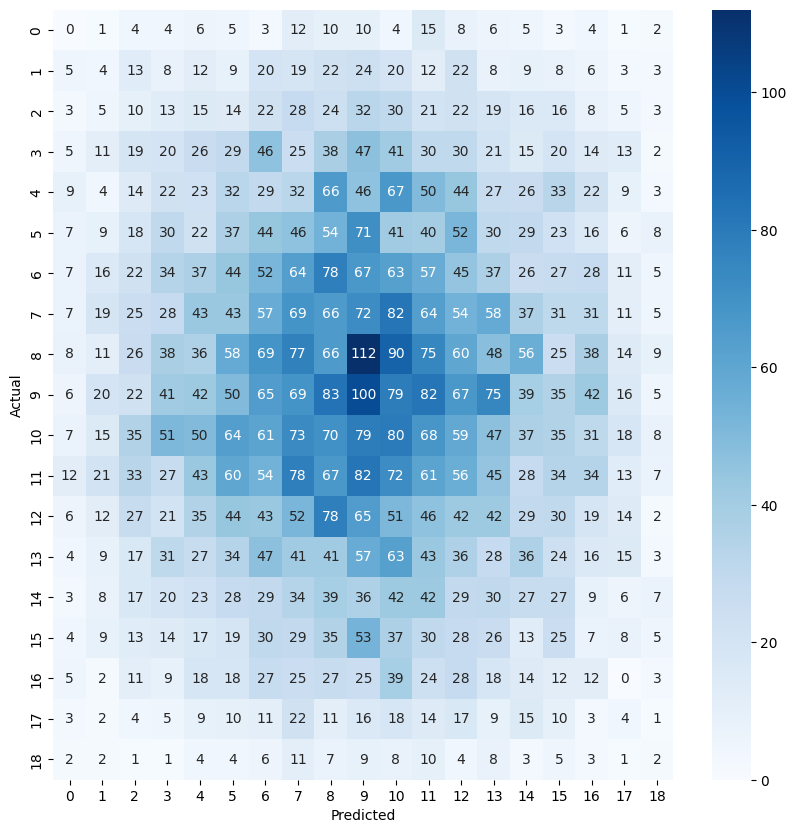

In [13]:
# Plot a clear confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#### Saving the predictions in a .csv file for submission

In [14]:
import csv
output = y_pred
predictions_file = open("submission_dummy.csv", "w")
open_file_object = csv.writer(predictions_file)
ids = range(y_pred.__len__())
ids = [x for x in ids]
open_file_object.writerow(["Index", "Class"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print('Saved "dummy_output" to file.')

Saved "dummy_output" to file.


The accuracy we get after we have used Dummy classifier is 6%. Hence, we need to improve our model to get a better accuracy. We would change the model and try to improve the accuracy.

## Random Forest Classifier

#### Import required libraries

In [17]:
from sklearn.preprocessing import LabelEncoder

In [16]:
y_train = train['result']
x_train = train.drop(['result'], axis=1)

# Leave the last column as it is containing null values
x_train = x_train.iloc[:, :1568]
test = test.iloc[:, :1568]

x_train=x_train/255
test = test / 255

In [18]:
enc = LabelEncoder()
label_encoded = enc.fit_transform(train['result'])

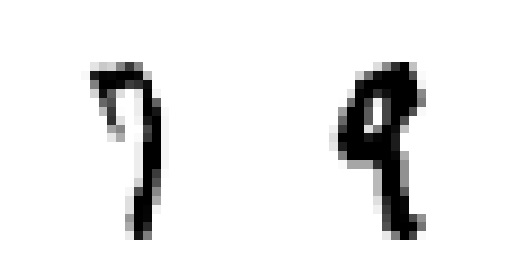

In [19]:
# Source : https://stackoverflow.com/questions/42353676/display-mnist-image-using-matplotlib
import matplotlib

number = np.array(x_train.iloc[6])
number_image = number.reshape(28, 56)

plt.imshow(number_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=1235)

In [21]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((40000, 1568), (10000, 1568), (40000,), (10000,))

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train,Y_train)

predictions  = random_forest_model.predict(X_val)
accuracy     = accuracy_score(Y_val,predictions)
print('accuracy: ',accuracy)

accuracy:  0.709


In [23]:
# See the classification report
print(classification_report(Y_val, predictions))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       103
           1       0.84      0.90      0.87       189
           2       0.85      0.84      0.85       292
           3       0.83      0.85      0.84       429
           4       0.81      0.76      0.79       510
           5       0.76      0.73      0.74       601
           6       0.71      0.75      0.73       706
           7       0.73      0.72      0.72       806
           8       0.67      0.76      0.71       928
           9       0.65      0.75      0.69       960
          10       0.66      0.73      0.69       916
          11       0.60      0.64      0.62       773
          12       0.63      0.69      0.66       709
          13       0.71      0.64      0.67       656
          14       0.77      0.54      0.63       465
          15       0.78      0.66      0.72       366
          16       0.74      0.61      0.67       322
          17       0.84    

In [24]:
# Compare prediction with actual values
df = pd.DataFrame({'Actual': Y_val, 'Predicted': predictions})
df.head(10)

,Actual,Predicted
14227,11,11
4787,8,8
22675,6,6
27192,5,5
20697,11,11
25440,11,11
49472,10,8
319,8,8
25863,10,10
20479,9,9


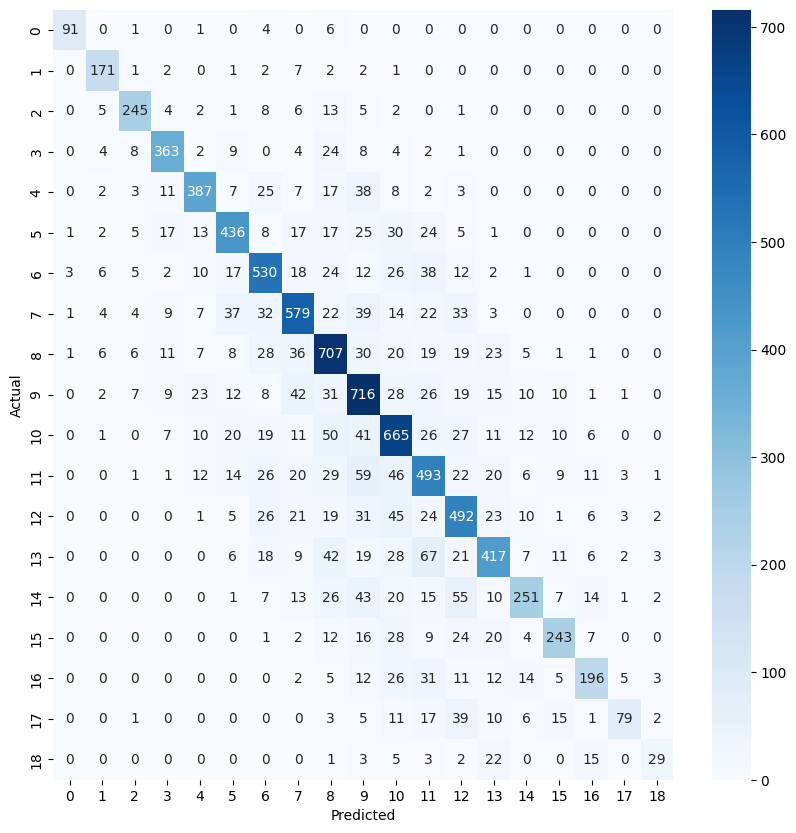

In [25]:
# Plot a clear confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_val, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
y_pred = random_forest_model.predict(test)

In [27]:
import csv
output = y_pred
predictions_file = open("submission_forest.csv", "w")
open_file_object = csv.writer(predictions_file)
ids = range(y_pred.__len__())
ids = [x for x in ids]
open_file_object.writerow(["Index", "Class"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print('Saved "forest_output" to file.')

Saved "forest_output" to file.


## Convolutional Neural Network

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import numpy as np
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# For adding new activation function
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

In [32]:
X = train.drop(['result'], axis = 1)
y = train['result']
X = X.iloc[:, :1568]

In [33]:
print(X.shape)

(50000, 1568)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
print(X_train.shape)
print(X_test.shape)

(40000, 1568)
(10000, 1568)


In [36]:
X_train = X_train.values.reshape(-1, 28, 56)
X_test = X_test.values.reshape(-1, 28, 56)

Text(0.5, 1.0, '56x28 data')

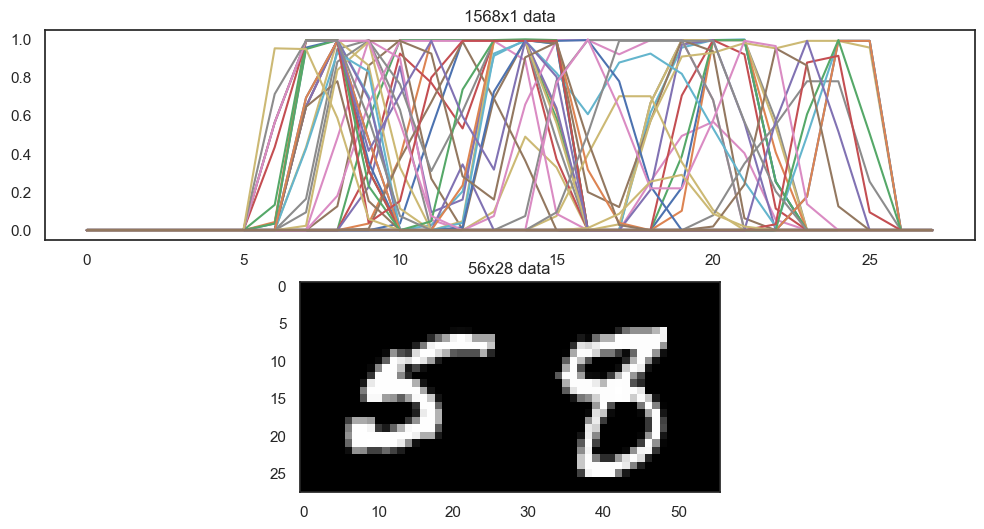

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(X_train[0])
ax[0].set_title('1568x1 data')
ax[1].imshow(X_train[0].reshape(28,56), cmap='gray')
ax[1].set_title('56x28 data')

#### Image transformations

In [38]:
X_train = X_train.reshape(-1, 28, 56, 1)
X_test = X_test.reshape(-1, 28, 56, 1)

In [39]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

#### One hot encoding

In [40]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#example:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [41]:
print(y_train.shape)

(40000, 19)


#### Train model

In [45]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 56, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19, activation='softmax'))

In [46]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [47]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

C:\Users\pupne\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [49]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                           epochs=50, 
                           verbose=1,  
                           validation_data=(X_test, y_test), #For speed
                           callbacks=[learning_rate_reduction])

#### Evaluate model

In [ ]:
final_loss, final_acc = model.evaluate(X_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

In [ ]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['accuracy'], color='b')
plt.plot(hist.history['val_accuracy'], color='r')
plt.show()

In [ ]:
y_hat = model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

In [ ]:
results = model.predict(test)

In [ ]:
import csv
output = results
predictions_file = open("submission_cnn.csv", "w")
open_file_object = csv.writer(predictions_file)
ids = range(results.__len__())
ids = [x for x in ids]
open_file_object.writerow(["Index", "Class"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
# print('Saved "forest_output" to file.')

### CNN Improvements

In [74]:
from keras.utils.generic_utils import get_custom_objects
def swish(x):
    return (K.sigmoid(x) * x)
get_custom_objects().update({'swish': Activation(swish)})

In [75]:
model = Sequential()

get_custom_objects().update({'swish': Activation(swish )})

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='swish', input_shape = (28,56,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='swish'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='swish'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='swish'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "swish"))
model.add(Dropout(0.5))
model.add(Dense(19, activation = "sigmoid"))

In [76]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 56, 32)        832       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 56, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 28, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 28, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 28, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 28, 64)        36928     
                                                      

In [77]:
# Define the optimizer
optimizer = Adam(lr=0.001,  epsilon=1e-08, decay=0.0)

C:\Users\pupne\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [78]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [79]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [80]:
epochs = 25 # Turn epochs to 30 to get 0.996 accuracy
batch_size = 128

In [82]:
# Splittin the data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state=1235)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size, 
                              callbacks=[learning_rate_reduction]
                             )

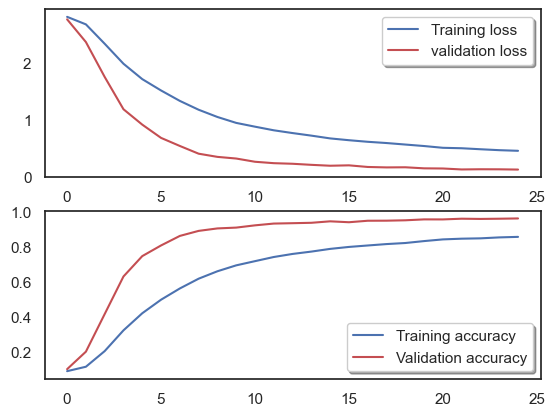

In [35]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

313/313 [==============================] - 11s 35ms/step


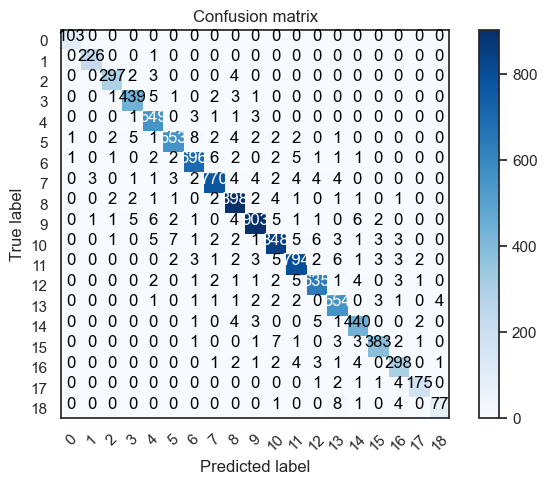

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(19))

total error: (362,)


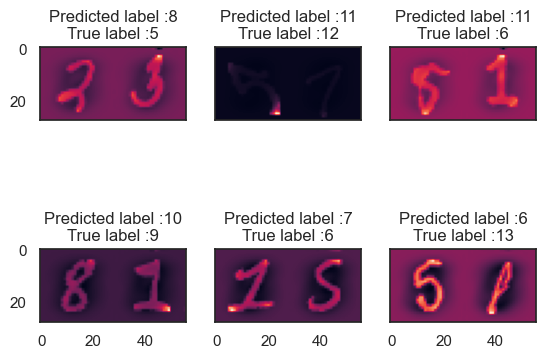

In [38]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,56)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

print('total error:',sorted_dela_errors.shape)

In [41]:
test = df_test.values.reshape(-1,28,56,1)

In [42]:
test.shape

(10000, 28, 56, 1)

In [43]:
results = model.predict(test)

313/313 [==============================] - 11s 35ms/step


In [44]:
results = np.argmax(results, axis = 1)

In [45]:
results

array([14, 12, 12, ..., 12,  8, 13], dtype=int64)

In [46]:
import csv
output = results
predictions_file = open("submission_cnn.csv", "w")
open_file_object = csv.writer(predictions_file)
ids = range(results.__len__())
ids = [x for x in ids]
open_file_object.writerow(["Index", "Class"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print('Saved "forest_output" to file.')